Heart Failure Prediction

In [1]:
#import data manupulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data import 
url='https://raw.githubusercontent.com/Saimehtre18/Heart_Failure_Prediction/refs/heads/main/heart.csv'
df=pd.read_csv(url)
df.sample(frac=1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
811,58,F,ASY,100,248,0,LVH,122,N,1.0,Flat,0
112,47,M,ASY,140,276,1,Normal,125,Y,0.0,Up,0
680,57,M,ASY,150,276,0,LVH,112,Y,0.6,Flat,1
841,62,F,NAP,130,263,0,Normal,97,N,1.2,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
750,46,F,NAP,142,177,0,LVH,160,Y,1.4,Down,0
863,60,M,NAP,140,185,0,LVH,155,N,3.0,Flat,1
488,65,M,TA,140,252,0,Normal,135,N,0.3,Up,0
716,67,M,ASY,120,237,0,Normal,71,N,1.0,Flat,1


In [3]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [4]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [5]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])
df['Sex']=le.fit_transform(df['Sex'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [10]:
Numerical_Data=df.select_dtypes(include=['int64','int32','float64'])
Numerical_Data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [11]:
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,Age,28.0,77.0,53.510893,54.0,47.00,60.0,13.00,9.432617,-0.195933,-0.386140,No Outliers
1,Sex,0.0,1.0,0.789760,1.0,1.00,1.0,0.00,0.407701,-1.424540,0.029372,Has Outliers
2,ChestPainType,0.0,3.0,0.781046,0.0,0.00,2.0,2.00,0.956519,0.793916,-0.717257,No Outliers
3,RestingBP,0.0,200.0,132.396514,120.0,120.00,140.0,20.00,18.514154,0.179839,3.271251,Has Outliers
4,Cholesterol,0.0,603.0,198.799564,0.0,173.25,267.0,93.75,109.384145,-0.610086,0.118208,Has Outliers
5,FastingBS,0.0,1.0,0.233115,0.0,0.00,0.0,0.00,0.423046,1.264484,-0.401960,Has Outliers
6,RestingECG,0.0,2.0,0.989107,1.0,1.00,1.0,0.00,0.631671,0.008492,-0.487634,Has Outliers
7,MaxHR,60.0,202.0,136.809368,150.0,120.00,156.0,36.00,25.460334,-0.144359,-0.448248,Has Outliers
8,ExerciseAngina,0.0,1.0,0.404139,0.0,0.00,1.0,1.00,0.490992,0.391329,-1.850898,No Outliers
9,Oldpeak,-2.6,6.2,0.887364,0.0,0.00,1.5,1.50,1.066570,1.022872,1.203064,Has Outliers


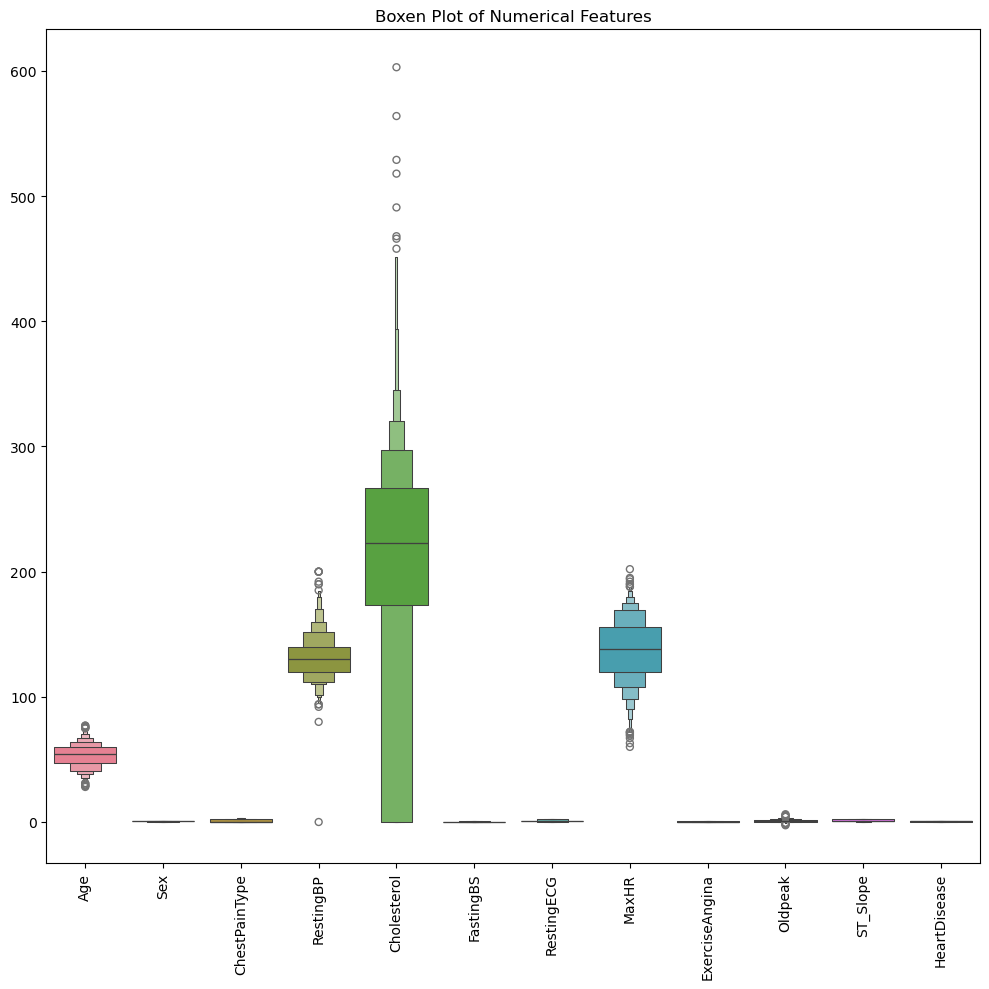

In [12]:
# Checking BoxenPlot 
plt.figure(figsize=(10, 10))
sns.boxenplot(data= df)

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

In [13]:
# Capping Outliers 
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

outlier_cols = ['Sex', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG','MaxHR','Oldpeak']
for col in outlier_cols:
    df = cap_outliers(df, col)

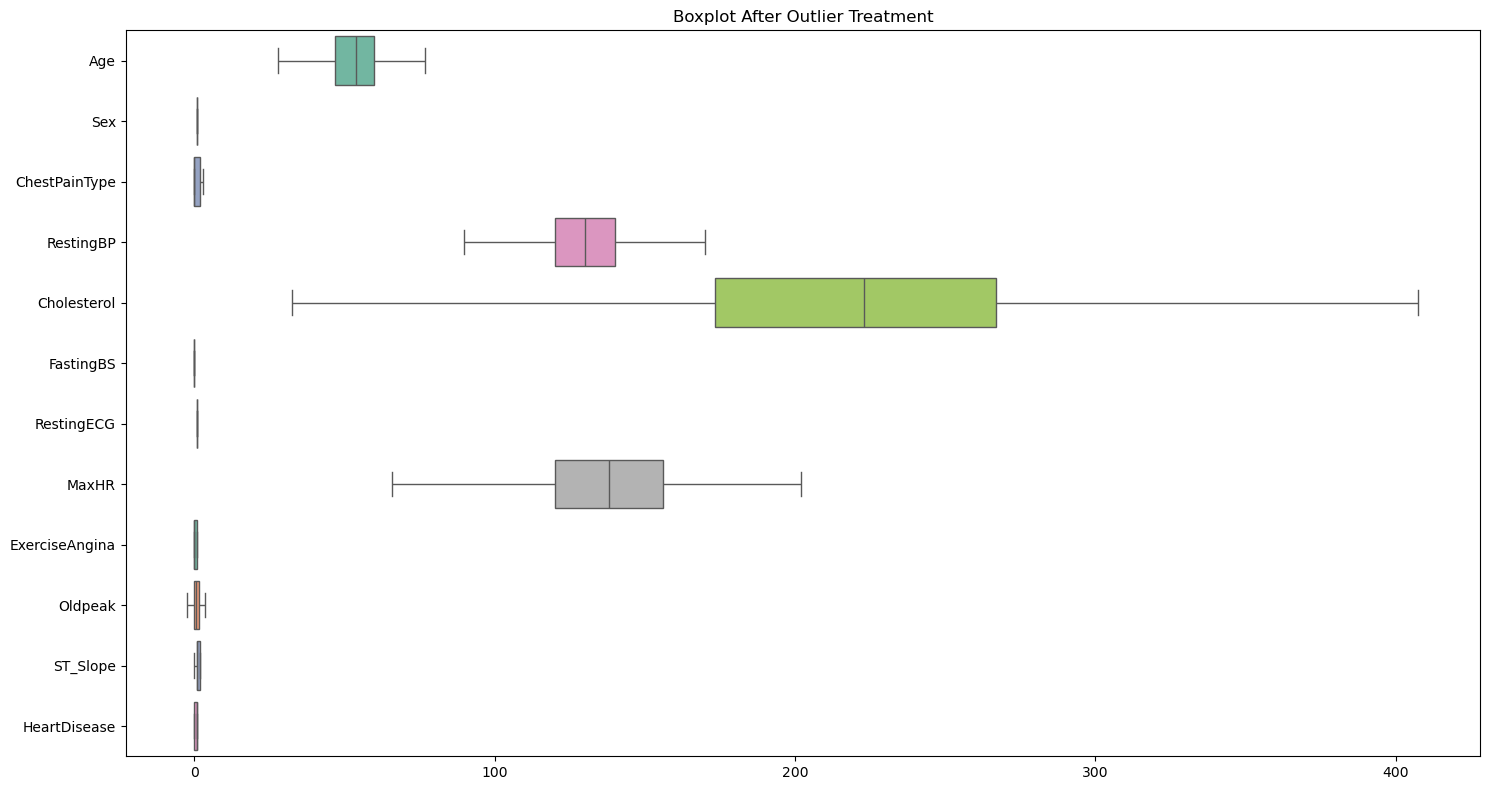

In [14]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

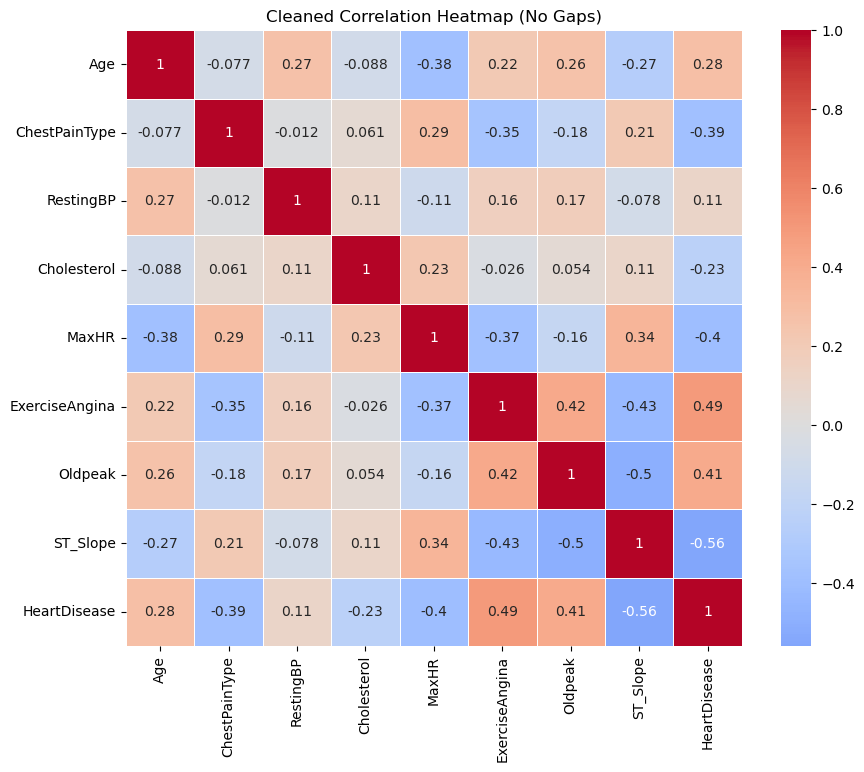

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation
corr = df.corr()

# Drop rows and columns with all NaNs (if any)
corr = corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Cleaned Correlation Heatmap (No Gaps)")
plt.show()

In [16]:
X=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [17]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [18]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of RandomForestClassifier: ",accuracy_score_LR)
print("Confusion Matrix of RandomForestClassifier: \n",confusion_matrix_LR)

Accuracy of RandomForestClassifier:  0.8532608695652174
Confusion Matrix of RandomForestClassifier: 
 [[71  6]
 [21 86]]


In [22]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of DecisionTreeClassifier: ",accuracy_score_LR)
print("Confusion Matrix of DecisionTreeClassifier: \n",confusion_matrix_LR)

Accuracy of DecisionTreeClassifier:  0.7663043478260869
Confusion Matrix of DecisionTreeClassifier: 
 [[65 12]
 [31 76]]


In [24]:
from xgboost import XGBClassifier
XB=XGBClassifier()
XB.fit(X_train,y_train)
y_pred=XB.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of XGBClassifier: ",accuracy_score_LR)
print("Confusion Matrix of XGBClassifier: \n",confusion_matrix_LR)

Accuracy of XGBClassifier:  0.8097826086956522
Confusion Matrix of XGBClassifier: 
 [[68  9]
 [26 81]]
